In [1158]:
#Import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [1159]:
# choose the features and the target
selected_features = [
    'patient_id', 'age_at_diagnosis',	'type_of_breast_surgery',
'cancer_type',	'cancer_type_detailed',	'cellularity',
'chemotherapy',	'pam50_+_claudin-low_subtype',	'cohort',
'er_status_measured_by_ihc',	'er_status',	'neoplasm_histologic_grade',
'her2_status_measured_by_snp6',	'her2_status',	'tumor_other_histologic_subtype',
'hormone_therapy',	'inferred_menopausal_state',	'integrative_cluster',
'primary_tumor_laterality',	'lymph_nodes_examined_positive',	'mutation_count',
'nottingham_prognostic_index',	'oncotree_code',	'overall_survival_months',
'overall_survival',	'pr_status',	'radio_therapy',
'3-gene_classifier_subtype',	'tumor_size',	'tumor_stage',
'death_from_cancer'
]


In [1160]:
#import the dataset
data = pd.read_csv('data2.csv')[selected_features]
#show some of the data to get a feel for it
data.head()

C:\Users\DELL\AppData\Local\Temp\ipykernel_11352\1087688311.py:2: DtypeWarning: Columns (678,688,690,692) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('data2.csv')[selected_features]


,patient_id,age_at_diagnosis,type_of_breast_surgery,cancer_type,cancer_type_detailed,cellularity,chemotherapy,pam50_+_claudin-low_subtype,cohort,er_status_measured_by_ihc,...,nottingham_prognostic_index,oncotree_code,overall_survival_months,overall_survival,pr_status,radio_therapy,3-gene_classifier_subtype,tumor_size,tumor_stage,death_from_cancer
0,0,75.65,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,NaN,0,claudin-low,1.0,Positve,...,6.044,IDC,140.500000,1,Negative,1,ER-/HER2-,22.0,2.0,Living
1,2,43.19,BREAST CONSERVING,Breast Cancer,Breast Invasive Ductal Carcinoma,High,0,LumA,1.0,Positve,...,4.020,IDC,84.633333,1,Positive,1,ER+/HER2- High Prolif,10.0,1.0,Living
2,5,48.87,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,High,1,LumB,1.0,Positve,...,4.030,IDC,163.700000,0,Positive,0,NaN,15.0,2.0,Died of Disease
3,6,47.68,MASTECTOMY,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,Moderate,1,LumB,1.0,Positve,...,4.050,MDLC,164.933333,1,Positive,1,NaN,25.0,2.0,Living
4,8,76.97,MASTECTOMY,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,High,1,LumB,1.0,Positve,...,6.080,MDLC,41.366667,0,Positive,1,ER+/HER2- High Prolif,40.0,2.0,Died of Disease


In [1161]:
#drop null and drop duplicates 
data = data.dropna()
data = data.drop_duplicates()

data.shape

(1092, 31)

In [1162]:
#display info about the data (data type, ...)
print(data.shape)
data.info()

(1092, 31)
<class 'pandas.core.frame.DataFrame'>
Index: 1092 entries, 1 to 1664
Data columns (total 31 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   patient_id                      1092 non-null   int64  
 1   age_at_diagnosis                1092 non-null   float64
 2   type_of_breast_surgery          1092 non-null   object 
 3   cancer_type                     1092 non-null   object 
 4   cancer_type_detailed            1092 non-null   object 
 5   cellularity                     1092 non-null   object 
 6   chemotherapy                    1092 non-null   int64  
 7   pam50_+_claudin-low_subtype     1092 non-null   object 
 8   cohort                          1092 non-null   float64
 9   er_status_measured_by_ihc       1092 non-null   object 
 10  er_status                       1092 non-null   object 
 11  neoplasm_histologic_grade       1092 non-null   float64
 12  her2_status_measured_by_snp6

In [1163]:
data.describe() 

,patient_id,age_at_diagnosis,chemotherapy,cohort,neoplasm_histologic_grade,hormone_therapy,lymph_nodes_examined_positive,mutation_count,nottingham_prognostic_index,overall_survival_months,overall_survival,radio_therapy,tumor_size,tumor_stage
count,1092.000000,1092.000000,1092.000000,1092.000000,1092.000000,1092.000000,1092.000000,1092.000000,1092.000000,1092.000000,1092.000000,1092.000000,1092.000000,1092.000000
mean,3270.071429,60.393526,0.220696,2.220696,2.445971,0.613553,1.889194,5.471612,4.128973,126.545452,0.443223,0.663919,26.025183,1.759158
std,2085.827937,13.000930,0.414906,0.955380,0.636365,0.487158,3.850981,3.812051,1.060455,77.134919,0.496994,0.472583,15.012539,0.624623
min,2.000000,21.930000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,2.002000,0.100000,0.000000,0.000000,1.000000,1.000000
25%,582.750000,50.787500,0.000000,1.000000,2.000000,0.000000,0.000000,3.000000,3.052000,60.825000,0.000000,0.000000,17.000000,1.000000
50%,3603.000000,60.995000,0.000000,2.000000,3.000000,1.000000,0.000000,5.000000,4.046000,116.983333,0.000000,1.000000,22.000000,2.000000
75%,5163.250000,69.705000,0.000000,3.000000,3.000000,1.000000,2.000000,7.000000,5.046000,188.433333,1.000000,1.000000,30.000000,2.000000
max,6346.000000,96.290000,1.000000,5.000000,3.000000,1.000000,41.000000,46.000000,6.360000,337.033333,1.000000,1.000000,180.000000,4.000000


In [1164]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

In [1165]:
# from sklearn.preprocessing import LabelEncoder

# # Define the list of categorical features to one-hot encode
# categorical_features = [
#     'type_of_breast_surgery', 'cancer_type', 'cancer_type_detailed', 'cellularity',
#     'pam50_+_claudin-low_subtype', 'er_status_measured_by_ihc', 'er_status',
#     'her2_status_measured_by_snp6', 'her2_status', 'tumor_other_histologic_subtype',
#     'inferred_menopausal_state', 'integrative_cluster','primary_tumor_laterality',	'pr_status',
#     'oncotree_code', '3-gene_classifier_subtype', 'death_from_cancer'
# ]

# # Perform one-hot encoding for the categorical features
# data_encoded = pd.get_dummies(data, columns=categorical_features, drop_first=True)
# # Define your target variable
# target = data_encoded['overall_survival']

# Define your features
# non_categorical_features = [
#     'patient_id', 'age_at_diagnosis','chemotherapy',
#     'cohort','neoplasm_histologic_grade','hormone_therapy',
#     'lymph_nodes_examined_positive',	'mutation_count','nottingham_prognostic_index',
#     'overall_survival_months','overall_survival',
#     'radio_therapy','tumor_size',	'tumor_stage',
# ]

In [1166]:
from sklearn.preprocessing import LabelEncoder
# import pandas as pd

# # Remove rows with missing values
# data.dropna(inplace=True)

# Assuming 'data' is your DataFrame
# Calculate the column-wise mean for the DataFrame (ignoring NaNs)

# List of categorical columns to label encode
categorical_cols = [
    'type_of_breast_surgery', 'cancer_type', 'cancer_type_detailed', 'cellularity',
    'pam50_+_claudin-low_subtype', 'er_status_measured_by_ihc', 'er_status',
    'her2_status_measured_by_snp6', 'her2_status', 'tumor_other_histologic_subtype',
    'inferred_menopausal_state', 'integrative_cluster','primary_tumor_laterality',	'pr_status',
    'oncotree_code', '3-gene_classifier_subtype', 'death_from_cancer'
]

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Apply label encoding to each categorical column
for col in categorical_cols:
    data[col] = label_encoder.fit_transform(data[col])
    
# Replace missing values with the respective column mean
column_means = data.mean()

data.fillna(column_means, inplace=True)

In [1167]:
#as we see here all the data is numerical (encoded)
data.head()

,patient_id,age_at_diagnosis,type_of_breast_surgery,cancer_type,cancer_type_detailed,cellularity,chemotherapy,pam50_+_claudin-low_subtype,cohort,er_status_measured_by_ihc,...,nottingham_prognostic_index,oncotree_code,overall_survival_months,overall_survival,pr_status,radio_therapy,3-gene_classifier_subtype,tumor_size,tumor_stage,death_from_cancer
1,2,43.19,0,0,1,0,0,2,1.0,1,...,4.020,1,84.633333,1,1,1,0,10.0,1.0,2
4,8,76.97,1,0,4,0,1,3,1.0,1,...,6.080,4,41.366667,0,1,1,0,40.0,2.0,0
5,10,78.77,1,0,1,2,0,3,1.0,1,...,4.062,1,7.800000,0,1,1,0,31.0,4.0,0
8,28,86.41,0,0,1,2,0,3,1.0,1,...,5.032,1,36.566667,0,0,1,0,16.0,2.0,1
9,35,84.22,1,0,2,0,0,1,1.0,0,...,3.056,2,36.266667,0,0,0,0,28.0,2.0,0


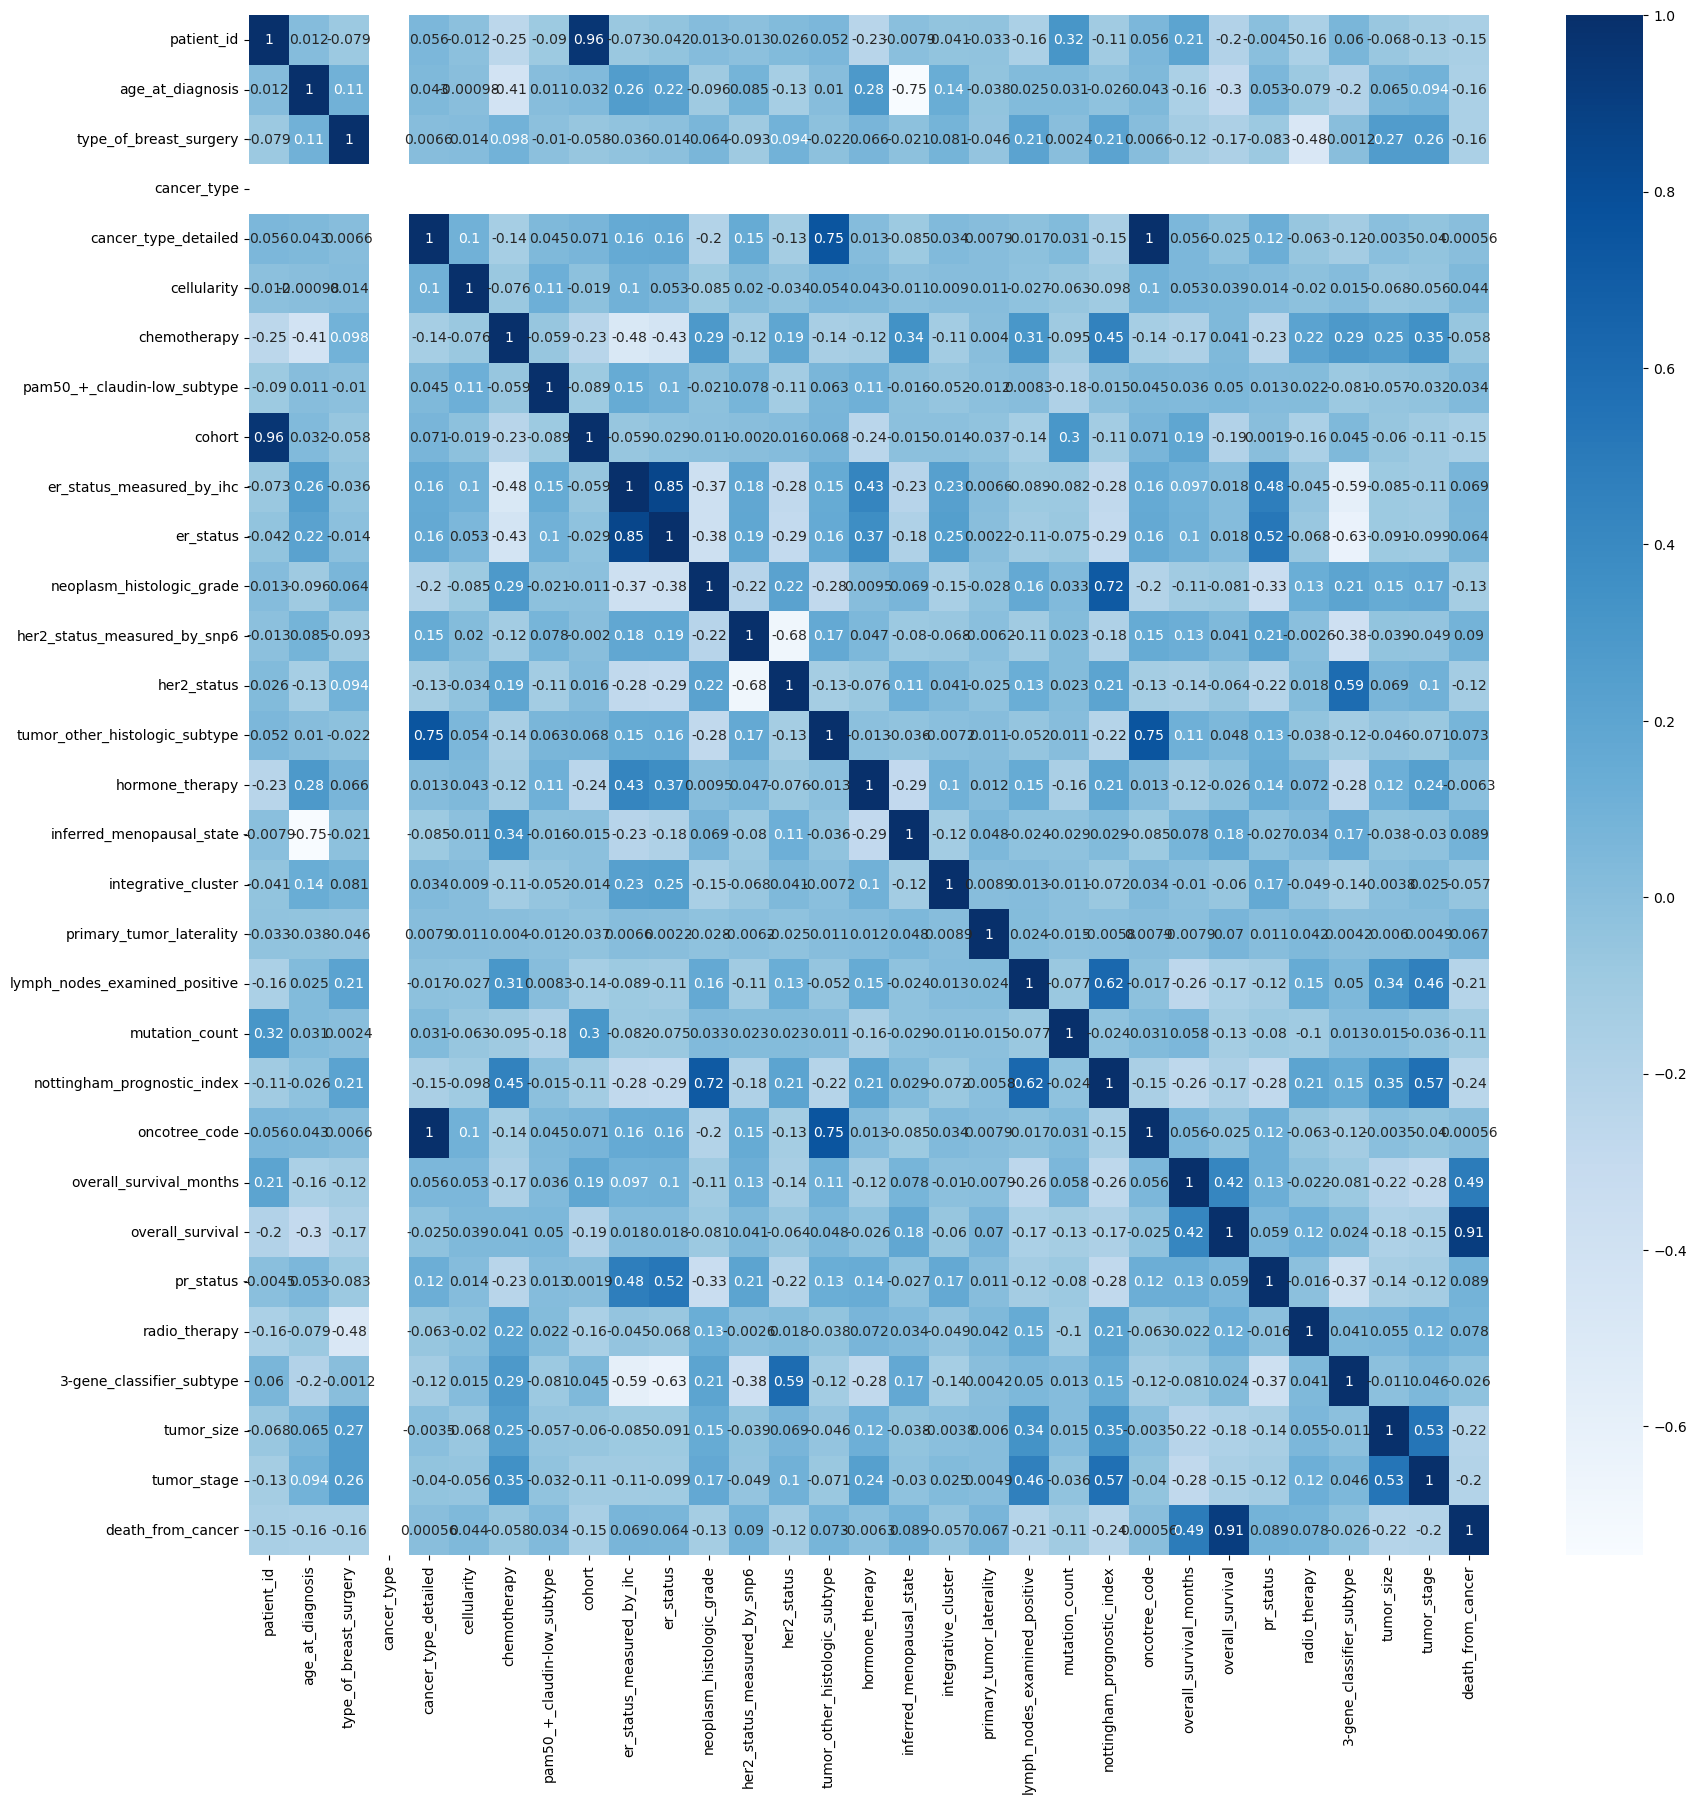

In [1168]:
#draw the correlation matrix
corr = data.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr, annot=True, cmap=plt.cm.Blues)
plt.show()
#we can see that the cancer_type is nullified so we can drop it
data = data.drop(columns=['cancer_type'])


In [1169]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [1170]:
# # Split the dataset into features (X) and target variable (y)
X = data.drop(columns=['death_from_cancer'])
y = data['death_from_cancer']

In [1171]:
from sklearn.ensemble import RandomForestClassifier


model = RandomForestClassifier()
model.fit(X, y)

# select the most important features that are correlated with death
feature_importances = model.feature_importances_
relevant_features = [feature for feature, importance in zip(X.columns, feature_importances) if importance > 0.02]
print(relevant_features)


['patient_id', 'age_at_diagnosis', 'integrative_cluster', 'lymph_nodes_examined_positive', 'mutation_count', 'nottingham_prognostic_index', 'overall_survival_months', 'overall_survival', 'tumor_size']


In [1172]:
from sklearn.model_selection import train_test_split

#redefine the features
X = data[relevant_features]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [1173]:
from sklearn.ensemble import RandomForestClassifier

# Create a Random Forest Classifier model
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model on the training data
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [1174]:
# # Standardize the features
# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)

In [1175]:
#try another scaler
from sklearn.preprocessing import MinMaxScaler

# Create a MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the scaler on the training data
X_train = scaler.fit_transform(X_train)

# Transform the testing data using the same scaler
X_test = scaler.transform(X_test)

In [1176]:
#modify some hyper params
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Create a RandomForestClassifier model
rfc = RandomForestClassifier(random_state=42)

# Define a simplified grid of hyperparameters
param_grid = {
    'n_estimators': [100, 200],  # Reduced number of values
    'max_depth': [None, 10],    # Reduced number of values
    # Include only the most important hyperparameters
}

# Create a GridSearchCV object with a reduced grid
grid_search = GridSearchCV(rfc, param_grid, cv=3, scoring='accuracy', n_jobs=-1)

# Fit the grid search
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Train the model with the best hyperparameters
best_rfc = RandomForestClassifier(
    n_estimators=best_params['n_estimators'],
    max_depth=best_params['max_depth'],
    random_state=42
)
best_rfc.fit(X_train, y_train)


RandomForestClassifier(max_depth=10, random_state=42)

In [1177]:
best_rfc = RandomForestClassifier(
    n_estimators=best_params['n_estimators'],
    max_depth=best_params['max_depth'],
    random_state=42
)

best_rfc.fit(X_train, y_train)

# Make predictions with the best model
pred_best_rfc = best_rfc.predict(X_test)

# Evaluate the best model
accuracy_best = accuracy_score(y_test, pred_best_rfc)
report_best = classification_report(y_test, pred_best_rfc)
print("Best Model Accuracy:", accuracy_best)
print("Best Model Report:\n", report_best)


Best Model Accuracy: 0.8201219512195121
Best Model Report:
               precision    recall  f1-score   support

           0       0.75      0.74      0.74       116
           1       0.59      0.60      0.59        72
           2       1.00      1.00      1.00       140

    accuracy                           0.82       328
   macro avg       0.78      0.78      0.78       328
weighted avg       0.82      0.82      0.82       328



In [1178]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
# List of algorithms to evaluate

# List of classifiers to evaluate
classifiers = [
    ('Logistic Regression', LogisticRegression()),
    ('Random Forest', RandomForestClassifier()),
    ('SVM', SVC()),
    ('Gradient Boosting', GradientBoostingClassifier()),
    ('KNN', KNeighborsClassifier()),
]

best_model = None
best_accuracy = 0

for name, classifier in classifiers:
    # Train the model on the training data
    classifier.fit(X_train, y_train)
    
    # Make predictions on the testing data
    y_pred = classifier.predict(X_test)
    
    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    
    print(f"{name} Accuracy:", accuracy)
    print(f"{name} Report:\n", report)
    
    # Check if this model is the best so far
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = classifier

print("Best Model:", best_model)
print("Best Model Accuracy:", best_accuracy)


Logistic Regression Accuracy: 0.850609756097561
Logistic Regression Report:
               precision    recall  f1-score   support

           0       0.76      0.84      0.80       116
           1       0.69      0.58      0.63        72
           2       1.00      1.00      1.00       140

    accuracy                           0.85       328
   macro avg       0.82      0.81      0.81       328
weighted avg       0.85      0.85      0.85       328

Random Forest Accuracy: 0.8170731707317073
Random Forest Report:
               precision    recall  f1-score   support

           0       0.74      0.74      0.74       116
           1       0.58      0.58      0.58        72
           2       1.00      1.00      1.00       140

    accuracy                           0.82       328
   macro avg       0.77      0.77      0.77       328
weighted avg       0.82      0.82      0.82       328

SVM Accuracy: 0.8475609756097561
SVM Report:
               precision    recall  f1-score   sup